# Probabilistic Time Series Analysis

## Week 9: Introduction to Gaussian Processes

# Setup

In [76]:
np.arange(0, 1, 0.2)

array([ 0. ,  0.2,  0.4,  0.6,  0.8])

In [28]:
import numpy as np
import GPy

%matplotlib inline

In [40]:
# NOTE: Read this function carefully! You will modify it in the following sections.

def uniform_samples(x_min, x_max, n_samples, f, noise_scale):
    """Generates f(x) + noise for x uniformly distributed in [x_min, x_max]."""
    X = np.random.uniform(x_min, x_max, size=(n_samples, 1))
    Y = f(X) + np.random.normal(scale=noise_scale, size=(n_samples, 1))
    return X, Y

# III. Choice of Kernel

In [44]:
# Build sample points and values:
np.random.seed(42)
X, Y = uniform_samples(-10.0, 10.0, 100, np.sin, 0.5)

## RBF. 
Changing `lengthscale`

Why `lengthscale=4.` and `lengthscale=4.76` give us the same results, while between them it is different?   

 /home/marina/.pyenv/versions/3.6.6/envs/py36/lib/python3.6/site-packages/matplotlib/figure.py:2359: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


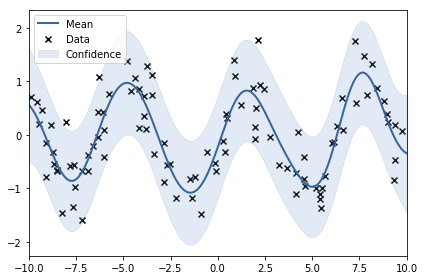

In [77]:
kernel = GPy.kern.RBF(input_dim=1, variance=1.0, lengthscale=4.)
m = GPy.models.GPRegression(X, Y, kernel)
_ = m.optimize()

_ = m.plot(plot_density=False, plot_limits=[-10.0, 10.0])


In [78]:
m.parameters[0]

rbf.,value,constraints,priors
variance,0.660863256339,+ve,
lengthscale,1.37132468626,+ve,


 /home/marina/.pyenv/versions/3.6.6/envs/py36/lib/python3.6/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /home/marina/.pyenv/versions/3.6.6/envs/py36/lib/python3.6/site-packages/GPy/kern/src/rbf.py:51: RuntimeWarning:overflow encountered in square
 /home/marina/.pyenv/versions/3.6.6/envs/py36/lib/python3.6/site-packages/GPy/kern/src/rbf.py:54: RuntimeWarning:invalid value encountered in multiply


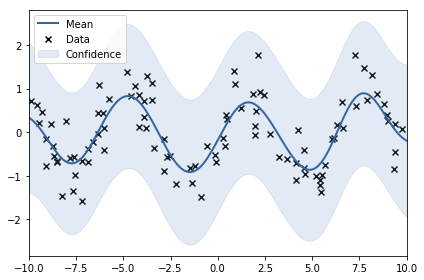

In [79]:
kernel = GPy.kern.RBF(input_dim=1, variance=1.0, lengthscale=4.74)
m = GPy.models.GPRegression(X, Y, kernel)
_ = m.optimize()

_ = m.plot(plot_density=False, plot_limits=[-10.0, 10.0])


In [80]:
m.parameters[0]

rbf.,value,constraints,priors
variance,0.481526185298,+ve,
lengthscale,1.40219892807,+ve,


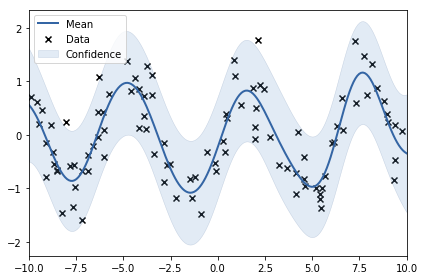

In [64]:
kernel = GPy.kern.RBF(input_dim=1, variance=1.0, lengthscale=4.76)
m = GPy.models.GPRegression(X, Y, kernel)
_ = m.optimize()

_ = m.plot(plot_density=False, plot_limits=[-10.0, 10.0])


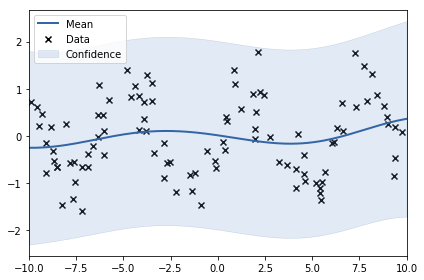

In [83]:
kernel = GPy.kern.RBF(input_dim=1, variance=1.0, lengthscale=4.77)
m = GPy.models.GPRegression(X, Y, kernel)
# _ = m.optimize()

_ = m.plot(plot_density=False, plot_limits=[-10.0, 10.0])


In [82]:
m.parameters[0]

rbf.,value,constraints,priors
variance,2.17097735588e-08,+ve,
lengthscale,2.06712985511,+ve,


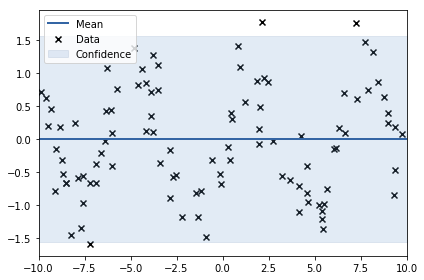

In [66]:
kernel = GPy.kern.RBF(input_dim=1, variance=1.0, lengthscale=5.)
m = GPy.models.GPRegression(X, Y, kernel)
_ = m.optimize()

_ = m.plot(plot_density=False, plot_limits=[-10.0, 10.0])


# References

The beginning of this notebook is based on:

https://github.com/savinlab/gp_intro/blob/master/gp_regression_basic.ipynb